<a href="https://colab.research.google.com/github/143shukla/Statistics/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
import prettytable

In [3]:
# BlackFriday.csv
# The dataset here is a sample of the transactions made in a retail store on BlackFriday

!wget https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv

--2021-05-12 15:19:28--  https://raw.githubusercontent.com/mathubhalan/Black-Friday-Sales/master/Data/BlackFriday.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24418530 (23M) [text/plain]
Saving to: ‘BlackFriday.csv’

BlackFriday.csv     100%[===================>]  23.29M  56.1MB/s    in 0.4s    

2021-05-12 15:19:29 (56.1 MB/s) - ‘BlackFriday.csv’ saved [24418530/24418530]



In [4]:
#Importing dataset
df = pd.read_csv("BlackFriday.csv")

#Choosing a column to work upon
purchase = df['Purchase']
print("Missing values : ", purchase.isnull().sum())
df.head(2)

Missing values :  0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


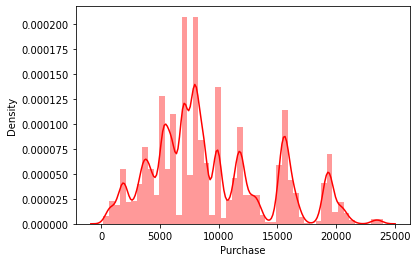

In [5]:
sn.distplot(purchase, color='red')
population_mean = np.round(purchase.mean(),3)
population_std = np.round(purchase.std(), 3)

In [6]:
""" Here we are creating n samples of each size m from data
    And we will calculate mean of each sample and store it in an list"""

def Sample_Mean_Calculator(data, n, m):
  sample_means = []
  for i in range(0,n):
    sample = random.sample(list(data), m)
    sample_means.append(data[sample].mean())

  return sample_means

In [7]:
# This function is responsible to plot graph. We will call this function with parameters and this function graph a distribution plot with line indicating population mean and sample mean.

def Central_Limit_Theorem(data, population_mean, i, j, color, key):
  sn.distplot(data, color = color, ax=axs[i,j])
  axs[i,j].axvline(population_mean, color='r', label="p_mean")
  axs[i,j].axvline(np.array(data).mean(), color='black', label="s_mean")
  axs[i,j].set_title(key)
  axs[i,j].legend()

In [8]:
# Creating different samples of different size to see the difference between sample mean and population mean according to sample size
samples = dict()

samples["50_sample_50_ele"] = Sample_Mean_Calculator(purchase, 50, 50)
samples["50_sample_100_ele"] = Sample_Mean_Calculator(purchase, 50, 100)
samples["50_sample_1000_ele"] = Sample_Mean_Calculator(purchase, 50, 1000)

samples["100_sample_50_ele"] = Sample_Mean_Calculator(purchase, 100, 50)
samples["100_sample_100_ele"] = Sample_Mean_Calculator(purchase, 100, 100)
samples["100_sample_1000_ele"] = Sample_Mean_Calculator(purchase, 100, 1000)


samples["1000_sample_50_ele"] = Sample_Mean_Calculator(purchase, 1000, 50)
samples["1000_sample_100_ele"] = Sample_Mean_Calculator(purchase, 1000, 100)
samples["1000_sample_1000_ele"] = Sample_Mean_Calculator(purchase, 1000, 1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

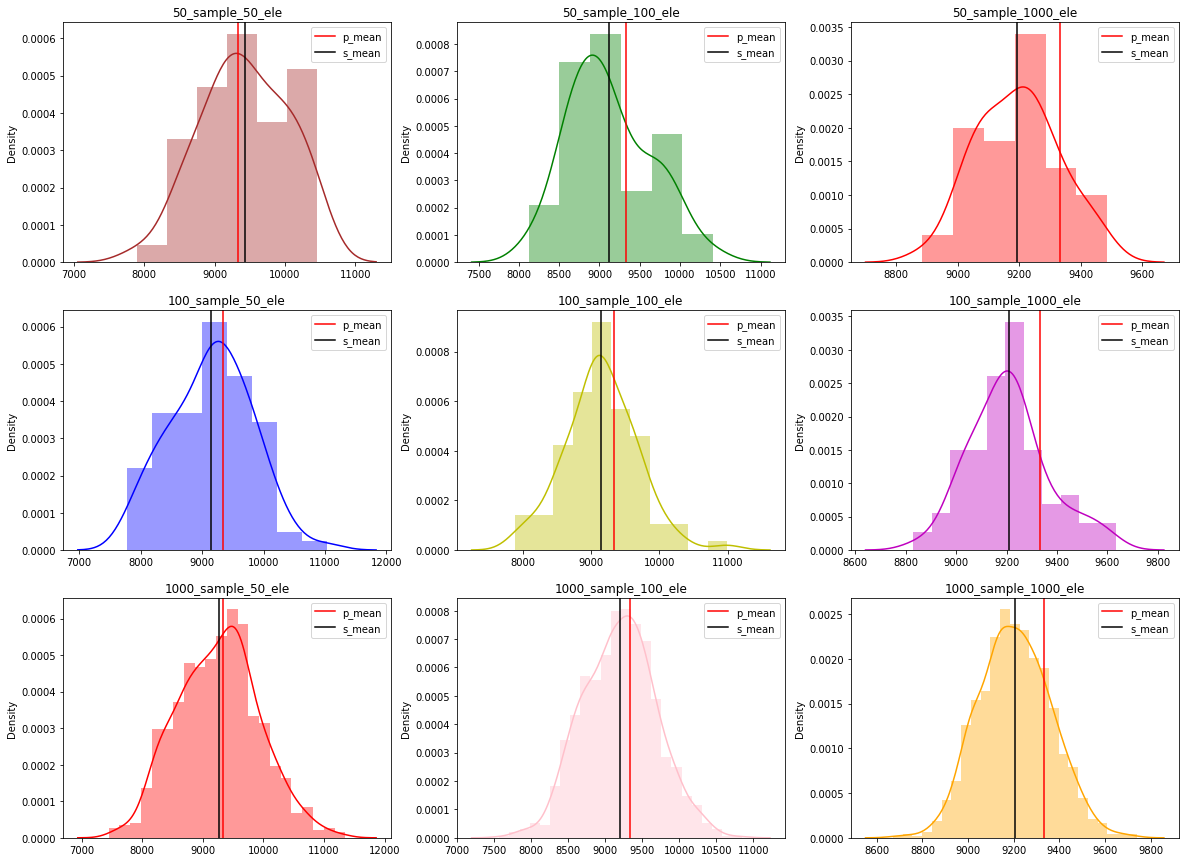

In [9]:
# Creating subplot
fig, axs = plt.subplots(3,3, figsize = (20,15))

# Creating list with grid values to draw plot on specific grid
plt_grid  = [(0,0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2,0), (2,1), (2,2)]

# Creating color variable to give colors to graph
clr = ['brown', 'g', 'r', 'blue', 'y', 'm', 'r', 'pink', 'orange']

for i, key in enumerate(samples.keys()):
  Central_Limit_Theorem(samples[key], population_mean, plt_grid[i][0], plt_grid[i][1], clr[i], key)

In [10]:
# Creating table for visualizing and comparing data.

table =prettytable.PrettyTable(["Samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])
sample_size = [(50,50), (50,100),(50,1000),(100,50),(100,100),(100,1000),(1000,50),(1000,100),(1000,1000)]

for i, key in enumerate(samples.keys()):
  sample_mean = np.round(np.array(samples[key]).mean(), 3)
  sample_std = np.round(np.array(samples[key]).std(), 3)
  population_std_estimate = np.round(population_std/np.sqrt(sample_size[i][1]),3)

  row = []
  row.append(key)
  row.append(population_mean)
  row.append(sample_mean)
  row.append(population_std)
  row.append(sample_std)
  row.append((str(sample_mean)+u"\u2248"+str(population_mean)))
  row.append(str(sample_std)+u"\u2248"+str(population_std_estimate))

  table.add_row(row)
print(table)

+----------------------+---------+-------------+----------+------------+------------------+-----------------+
|     Samples_name     |  P_Mean | Sampel mean |  P_Std   | Sample Std |     mu_x≈mu      |   std_x≈std/√n  |
+----------------------+---------+-------------+----------+------------+------------------+-----------------+
|   50_sample_50_ele   | 9333.86 |   9426.312  | 4981.022 |  611.527   | 9426.312≈9333.86 | 611.527≈704.423 |
|  50_sample_100_ele   | 9333.86 |   9118.539  | 4981.022 |  509.896   | 9118.539≈9333.86 | 509.896≈498.102 |
|  50_sample_1000_ele  | 9333.86 |   9194.45   | 4981.022 |  133.182   | 9194.45≈9333.86  | 133.182≈157.514 |
|  100_sample_50_ele   | 9333.86 |   9145.005  | 4981.022 |  665.723   | 9145.005≈9333.86 | 665.723≈704.423 |
|  100_sample_100_ele  | 9333.86 |   9143.44   | 4981.022 |  527.655   | 9143.44≈9333.86  | 527.655≈498.102 |
| 100_sample_1000_ele  | 9333.86 |   9208.651  | 4981.022 |  157.834   | 9208.651≈9333.86 | 157.834≈157.514 |
|  1000_sa